<a href="https://colab.research.google.com/github/guannan11/AZ-900T0x-MicrosoftAzureFundamentals/blob/master/DetailedStatsWithVisualizationExercise%20_W8DAL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 1. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set the graphs to show in the jupyter notebook
%matplotlib inline
# set seaborn graphs to a better style
sns.set(style="ticks")

In [2]:
# 3. assign it to online_rt
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


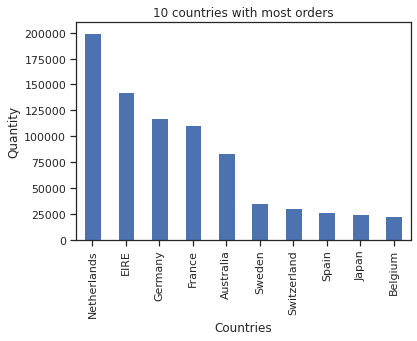

In [6]:
## 4.create a histogram with 10 contries that ordered most except UK
# groupby the Country
countries = online_rt.groupby('Country').sum()
# sort_values 10 contries that ordered most except UK
countries = countries.sort_values(by ='Quantity', ascending = False)[1:11]
# create plot
countries['Quantity'].plot(kind='bar')
# set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 countries with most orders')
# show plot
plt.show()


In [7]:
# 5. exclude negative quantity entries
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


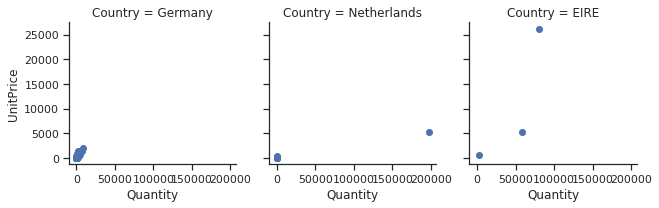

In [9]:
## 6. Create a scatterplot with the Quantity per UnitPrice 
##     by CustomerID for the top 3 Countries (except UK)
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()
# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]
# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)
# top 3 countries
top_countries = ['Netherlands', 'EIRE', 'Germany']
# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]
##############
# create the FaceGrid
g = sns.FacetGrid(customers, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
# adda legend
g.add_legend()

In [11]:
### 7. Investigate why the previous results look so uninformative.
## 7.1 displace the first few rows of dataframe
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [12]:
## 7.2 1 plot/country from top 3 countries
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [13]:
### 7.3  Modify, select and plot data
## Add a column Revenue (Quantity * UnitPrice) from each sale.
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
## Group by CustomerID and Country and find out the average price each customer spends per unit.
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


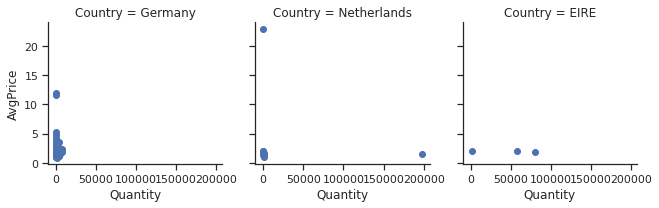

In [15]:
## plot
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
# adds legend
g.add_legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


[]

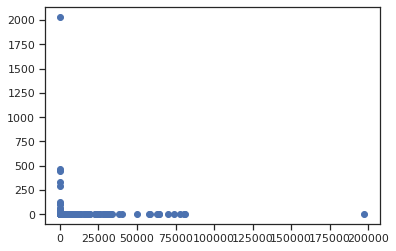

In [16]:
## improve the plots
# Plot the data for each CustomerID on a single graph
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

[]

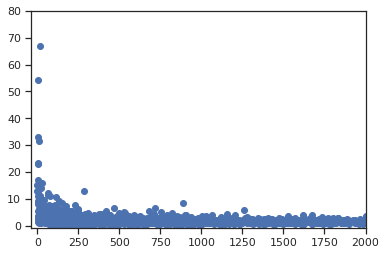

In [17]:
#Zoom in so we can see that curve more clearly
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

In [18]:
### 8.Plot a line chart showing revenue (y) per UnitPrice (x)
## 8.1 Group UnitPrice by intervals of 1 for prices
##       [0,50), and sum Quantity and Revenue.
price_start = 0 
price_end = 50
price_interval = 1
#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)
#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

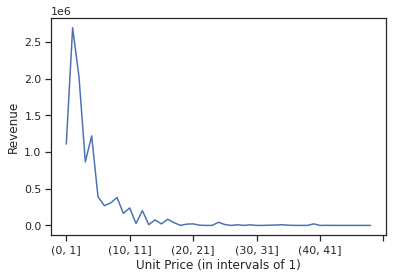

In [19]:
## 8.2 plot
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

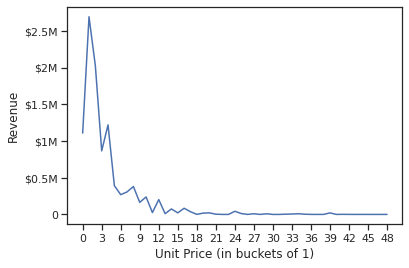

In [20]:
## 8.3 improve the plot
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()